In [5]:
import pandas as pd
import numpy as np
import random
import warnings
warnings.filterwarnings("ignore")


h = 3
s = 5
c = 0.98
itr = int(input("Enter number of iterations: "))
#itr = 10
d = 2
l_lim = -15
u_lim = 30

arr = np.random.uniform(l_lim , u_lim,size=(2,3))

global_best = float('inf')   
all_f_vals = []
best_progress = []
global_best_progress = []

def generate_homes(arr_x1, arr_x2, s):
    h1x1 = np.random.uniform(arr_x1[0][0], arr_x2[0][0], size=(s, 1))
    h1x2 = np.random.uniform(arr_x1[0][1], arr_x2[0][1], size=(s, 1))
    h2x1 = np.random.uniform(arr_x1[0][2], arr_x2[0][2], size=(s, 1))
    h2x2 = np.random.uniform(arr_x1[1][0], arr_x2[1][0], size=(s, 1))
    h3x1 = np.random.uniform(arr_x1[1][1], arr_x2[1][1], size=(s, 1))
    h3x2 = np.random.uniform(arr_x1[1][2], arr_x2[1][2], size=(s, 1))
    return h1x1, h1x2, h2x1, h2x2, h3x1, h3x2

#def sphere_fun(h1, h2, h3):
   # return np.sum(h1**2, axis=2), np.sum(h2**2, axis=2), np.sum(h3**2, axis=2)

def ackely_fun(x,y):
    a = 20
    b = 0.2
    c = 2 * np.pi
    part1 = -a * np.exp(-b * np.sqrt(0.5 * (x**2 + y**2)))
    part2 = -np.exp(0.5 * (np.cos(c * x) + np.cos(c * y)))
    result = part1 + part2 + a + np.e
    return result
    
def ISH(z, all_f_vals, s, h):
    if z >= 2:
        f_t   = all_f_vals[z]
        f_t1  = all_f_vals[z-1]
        f_t2  = all_f_vals[z-2]
        numerator   = f_t - f_t1
        denominator = f_t - f_t2
        denominator[denominator == 0] = 1e-8
        return abs(numerator / denominator)
    else:
        return np.random.random(size=(s,h))
    
def Ps1(fitness):
    fitness_1 = 1 / (fitness + 0.0000000001)
    Ps = fitness_1 / np.sum(fitness_1)
    return Ps.flatten()

def selection(Ps):
    indices = np.arange(0, 15)
    selected = np.random.choice(indices, size=15, p=Ps)
    while any(selected[b] == b for b in range(h*s)):
        selected = np.random.choice(indices, size=15, p=Ps)
    return selected
    
def LD1(ish, fun_vals_f, fx_fen, h, s):
    ish_d=1/ish
    ish_d = ish_d.T
    ish_d = ish_d.flatten()

    denom_ld = np.array([fun_vals_f[a] - fx_fen[a] for a in range(h*s)])
    denom_ld_d = 1/(denom_ld + 0.00000001)
    LD = np.array([ish_d[a] * denom_ld_d[a] for a in range(h*s)])
    return LD

def min_max_normalize(LD):
    min_val = np.min(LD)
    max_val = np.max(LD)
    normalized_array = (LD - min_val) / (max_val - min_val)
    return normalized_array

def manual_array(h1x1, h1x2, h2x1, h2x2, h3x1, h3x2):
    h1_l = [[h1x1[0],h1x2[0] ], [h1x1[1],h1x2[1]], 
           [h1x1[2],h1x2[2]], [h1x1[3],h1x2[3]]
           , [h1x1[4],h1x2[4]]]
    h2_l = [[h2x1[0],h2x2[0] ], [h2x1[1],h2x2[1]], 
           [h2x1[2],h2x2[2]], [h2x1[3],h2x2[3]],[h2x1[4],h2x2[4]]]
    h3_l = [[h3x1[0],h3x2[0] ], [h3x1[1],h3x2[1]], 
           [h3x1[2],h3x2[2]], [h3x1[3],h3x2[3]],[h3x1[4],h3x2[4]]]
    h1_h2_h3_l = [[h1x1[0],h1x2[0] ], [h1x1[1],h1x2[1]], 
           [h1x1[2],h1x2[2]], [h1x1[3],h1x2[3]]
           , [h1x1[4],h1x2[4]],[h2x1[0],h2x2[0] ], [h2x1[1],h2x2[1]], 
           [h2x1[2],h2x2[2]], [h2x1[3],h2x2[3]],[h2x1[4],h2x2[4]],[h3x1[0],h3x2[0] ], [h3x1[1],h3x2[1]], 
           [h3x1[2],h3x2[2]], [h3x1[3],h3x2[3]],[h3x1[4],h3x2[4]]]
    return h1_l, h2_l, h3_l, h1_h2_h3_l

def Position_Updated(h , s , NLD , df_h1_h2_h3 , selected):
    for m in range(h*s):
        result = NLD[m]*(df_h1_h2_h3.iloc[m] - df_h1_h2_h3.iloc[selected[m]])   # Sh_up
        Sh_up.loc[len(Sh_up)] = result.values
    return Sh_up

def fill_missing_snail(h , arr , l_lim , u_lim):
        if arr.shape[1] < h:
            missing = h - arr.shape[1]
            padding = np.random.uniform(l_lim, u_lim, size=(2, missing))
            arr = np.concatenate((arr, padding), axis=1)
        return arr
        


for z in range(itr):
    #print(arr)
    arr_x1 = arr + c
    arr_x2 = arr - c 
    arr_x1 = np.clip(arr_x1, l_lim, u_lim)
    arr_x2 = np.clip(arr_x2, l_lim, u_lim)

    h1x1, h1x2, h2x1, h2x2, h3x1, h3x2 = generate_homes(arr_x1, arr_x2, s)      #Assign X1 X2 

    h1 = np.stack((h1x1, h1x2), axis=2)
    h2 = np.stack((h2x1 , h2x2), axis=2)
    h3 = np.stack((h3x1 , h3x2), axis=2)

    #f_vals1, f_vals2, f_vals3 = sphere_fun(h1, h2, h3)        #Function Values(Sphere Function)
    f_vals1 = ackely_fun(h1[:, 0, 0], h1[:, 0, 1]).reshape(-1, 1)
    f_vals2 = ackely_fun(h2[:, 0, 0], h2[:, 0, 1]).reshape(-1, 1)
    f_vals3 = ackely_fun(h3[:, 0, 0], h3[:, 0, 1]).reshape(-1, 1)

    f_vals = np.stack((f_vals1 , f_vals2 , f_vals3 ) , axis = 2)
    all_f_vals.append(f_vals.copy())

    ish = ISH(z, all_f_vals, s, h)                                             #ISH

    fitness = np.stack((f_vals1 , f_vals2 , f_vals3), axis=2)


    Ps = Ps1(fitness)                                                            #PS

    selected = selection(Ps)                                                       #Selection

    fun_vals_f = f_vals.T
    fun_vals_f = fun_vals_f.flatten()

    fx_fen = np.zeros(len(selected))
    fx_fen = np.array([fun_vals_f[i] for i in selected])

    LD = LD1(ish, fun_vals_f, fx_fen, h, s)                                        #Love Dart

    NLD = min_max_normalize(LD)                                                 #Normalization
    
    # Fixing NLD
    NLD[NLD == 0] += 1e-8
    NLD[NLD == 1] -= 1e-8

    h1_l, h2_l, h3_l, h1_h2_h3_l = manual_array(h1x1, h1x2, h2x1, h2x2, h3x1, h3x2)       #Arrays

    #print(h1_l)
    df_h1 = pd.DataFrame(h1_l, columns =['X1', 'X2'])
    df_h2 = pd.DataFrame(h2_l, columns =['X1', 'X2'])
    df_h3 = pd.DataFrame(h3_l, columns =['X1', 'X2'])
    df_h1_h2_h3 = pd.DataFrame(h1_h2_h3_l, columns =['X1', 'X2'])
    
    Sh_up = pd.DataFrame(columns =['X1', 'X2'])

    Sh_up = Position_Updated(h , s , NLD , df_h1_h2_h3 , selected)         # Updated positions   Sh_up

    Sh_up_fn = ackely_fun(Sh_up['X1'].to_numpy().astype(float), Sh_up['X2'].to_numpy().astype(float))   #Updated function vals using ackley function 

    Sh_up_fn = pd.DataFrame(Sh_up_fn, columns=['Function_Values'])          # New column named 'Function_Values' in DF

    Sh_upnfn = pd.concat([Sh_up, Sh_up_fn], axis=1)                         # Dataframe wiht X1 X2 and their Function Values

    Sh_upnfn['H'] = selected                                                # New Column "H"  i.e. selected values

    min_vals = Sh_upnfn.groupby('H')['Function_Values'].min()               # Groups dataframe by H and find .min minimum from every groupn of H

    best = min_vals.min()                                                   # Stores minimum values from all homes in arr

    min_rows = Sh_upnfn.loc[Sh_upnfn.groupby('H')['Function_Values'].idxmin()]  # Stores whole block of selected minimum value from all homes i.e. x1 x2 fun_val And H

    min_rows['X1'] = min_rows['X1'].apply(lambda x: x[0])                   # Values in [] form and are changed to normal 
    min_rows['X2'] = min_rows['X2'].apply(lambda x: x[0])                   # Same here values in [] form and are changed to normal 

    arr = min_rows[['X1', 'X2']].values.T                                   # New arr initialized with positions of new best snails
    arr = fill_missing_snail(h , arr , l_lim , u_lim)

    if best < global_best:                                                 # Finds Global best
        global_best = best
    best_progress.append(best)
    global_best_progress.append(global_best)

    # print("Function Value:\n", min_vals) #prints best of 3 homes 
    # print("\nFunction Value:\n", min_rows)  #prints whole block of selected minimum value from all homes i.e. x1 x2 fun_val And H
    print(f"Iteration {z+1} : {best}") # prints best from 3 bests of 3 homes
print(f"Global Best : {global_best}") # prints global best from 15 snails

Iteration 1 : 1.055690827644895e-06
Iteration 2 : 3.912795865090857e-09
Iteration 3 : 1.943778871194013e-08
Iteration 4 : 1.027975859990704e-07
Iteration 5 : 3.688349936581403e-08
Iteration 6 : 2.6978331124638544e-08
Iteration 7 : 8.611332136254646e-08
Iteration 8 : 6.540276320521343e-09
Iteration 9 : 3.1113814191741085e-08
Iteration 10 : 3.5041438639638045e-08
Iteration 11 : 6.204710389923207e-08
Iteration 12 : 2.445859026423136e-08
Iteration 13 : 7.800860846174373e-09
Iteration 14 : 4.004568099347239e-08
Iteration 15 : 1.795545090388373e-08
Iteration 16 : 7.833169668458595e-10
Iteration 17 : 3.812821036675018e-08
Iteration 18 : 5.291977034360684e-08
Iteration 19 : 2.5826299765441263e-08
Iteration 20 : 4.4404409482723395e-08
Iteration 21 : 2.886026395643171e-08
Iteration 22 : 1.877048605436471e-08
Iteration 23 : 4.6279631238377306e-08
Iteration 24 : 3.820726535153085e-08
Iteration 25 : 1.7876179203568654e-08
Iteration 26 : 5.539358882700185e-08
Iteration 27 : 3.1767573904772917e-08
It

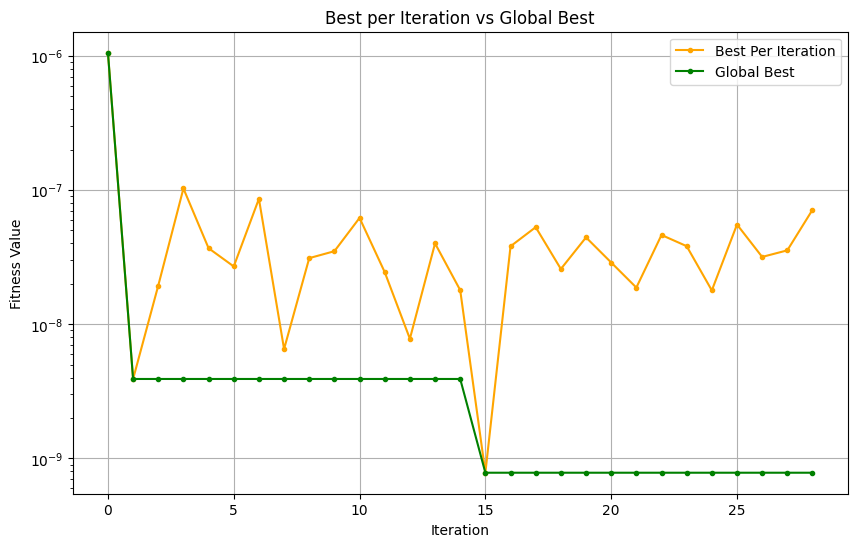

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(best_progress, marker='.', linestyle='-', color='orange', label='Best Per Iteration')
plt.plot(global_best_progress, marker='.', linestyle='-', color='green', label='Global Best')
plt.title('Best per Iteration vs Global Best')
plt.xlabel('Iteration')
plt.ylabel('Fitness Value')
plt.yscale('log')
#plt.ticklabel_format(style='plain', axis='y')
plt.legend()
plt.grid(1)
plt.show()


In [361]:
print(df_h1_h2_h3)

                        X1                     X2
0     [0.7628775609651883]   [0.5390286266074713]
1    [0.30940844147013336]     [0.60647677034961]
2     [0.5930050641794999]  [-0.6018757041687881]
3    [-0.7033290188063388]   [0.7181723133467316]
4   [0.034164619995093126]  [-0.6448394148732577]
5     [0.9415445268285844]  [-1.0448559791315328]
6    [-0.7687629172352399]  [-1.1965972657006052]
7    [-0.6066765490653452]  [-1.5400767781764881]
8     [0.5608669352418788]  [-1.7943686627660616]
9    [-0.1282536054080241]  [-0.8566543051136755]
10  [-0.18356463261147515]  [-0.7913750201246728]
11   [0.05492399515548241]  [-0.6579780756551041]
12   [0.28010750218256586]   [0.5041118948272674]
13   [0.24185049131273673]  [-0.2940778699045914]
14    [0.8925147766774685]   [0.9584086298631606]
